# Dense Subgraphs

This example uses the frequent paths obtained from the twitter data to discover dense subgraphs

In [1]:
import networkx as nx
import folium
%matplotlib inline
print(folium.__version__)

0.1.6


We will use the frequent paths from London (51.23, 51.8, -0.5, 0.25). You can also use "bcntwitter" (41.20, 41.6, 1.90, 2.40) and "paristwitter" (48.7, 49.05, 1.97, 2.68) and the networkx graph library. First we will build a graph with all the frequent paths.

In [2]:
fname = '/home/bejar/Data/City/londontwitter.txt'
coord = (51.23, 51.8, -0.5, 0.25)

rfile = open(fname, 'r')

gr = nx.Graph()

mymap = folium.Map(location=[(coord[0] + coord[1]) / 2.0, (coord[2] + coord[3]) / 2.0], zoom_start=13, width=800,
                   height=500)
for lines in rfile:
    vals = lines.replace('[', '').replace(']','').replace('\n','').replace('\'','').replace(' ','').split(',')
    for v1 in vals:
        for v2 in vals:
            if v1 != v2:
                x1, y1, _= v1.split('#')
                x2, y2, _= v2.split('#')
                mymap.line([(x1, y1), (x2, y2)],line_color='red', line_opacity=1.0, line_weight=2)
                gr.add_edge(v1,v2)

This is the complete graph

In [7]:
mymap

<iframe srcdoc="<!DOCTYPE html>
<head>
  <meta http-equiv=&quot;content-type&quot; content=&quot;text/html; charset=UTF-8&quot; />
   <link rel=&quot;stylesheet&quot; href=&quot;https://rawgit.com/andrewgiessel/leafletstuff/master/leaflet.css&quot; />
   <script src=&quot;https://cdnjs.cloudflare.com/ajax/libs/leaflet/0.7.3/leaflet.js&quot;></script>

   <script src=&quot;https://ajax.googleapis.com/ajax/libs/jquery/1.11.1/jquery.min.js&quot;></script>

   <link rel=&quot;stylesheet&quot; href=&quot;https://maxcdn.bootstrapcdn.com/bootstrap/3.2.0/css/bootstrap.min.css&quot;>
   <link rel=&quot;stylesheet&quot; href=&quot;https://maxcdn.bootstrapcdn.com/bootstrap/3.2.0/css/bootstrap-theme.min.css&quot;>
   <script src=&quot;https://maxcdn.bootstrapcdn.com/bootstrap/3.2.0/js/bootstrap.min.js&quot;></script>

   <link href=&quot;https://maxcdn.bootstrapcdn.com/font-awesome/4.1.0/css/font-awesome.min.css&quot; rel=&quot;stylesheet&quot;>

   <link rel=&quot;stylesheet&quot; href=&quot;https://rawgit.com/lvoogdt/Leaflet.awesome-markers/2.0/develop/dist/leaflet.awesome-markers.css&quot;>
   <script src=&quot;https://rawgithub.com/lvoogdt/Leaflet.awesome-markers/2.0/develop/dist/leaflet.awesome-markers.js&quot;></script>


   <link rel=&quot;stylesheet&quot; href=&quot;https://cdnjs.cloudflare.com/ajax/libs/leaflet.markercluster/0.4.0/MarkerCluster.Default.css&quot;>
   <link rel=&quot;stylesheet&quot; href=&quot;https://cdnjs.cloudflare.com/ajax/libs/leaflet.markercluster/0.4.0/MarkerCluster.css&quot;>
   <script src=&quot;https://cdnjs.cloudflare.com/ajax/libs/leaflet.markercluster/0.4.0/leaflet.markercluster-src.js&quot;></script>
   <script src=&quot;https://cdnjs.cloudflare.com/ajax/libs/leaflet.markercluster/0.4.0/leaflet.markercluster.js&quot;></script>

   <link rel=&quot;stylesheet&quot; href=&quot;https://birdage.github.io/Leaflet.awesome-markers/dist/leaflet.awesome.rotate.css&quot;>

   
   
   
   

   <style>

      html, body {
        width: 100%;
        height: 100%;
        margin: 0;
        padding: 0;
      }

      #map {
        position:absolute;
        top:0;
        bottom:0;
        right:0;
        left:0;
      }

   </style>
</head>

<body>

   <div class=&quot;folium-map&quot; id=&quot;folium_92b3728bdd974f52a1f15edec3b4c179&quot; style=&quot;width: 800px; height: 500px&quot;></div>

   <script>

      

      var base_tile = L.tileLayer('https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', {
          maxZoom: 18,
          minZoom: 1,
          attribution: 'Map data (c) <a href=&quot;http://openstreetmap.org&quot;>OpenStreetMap</a> contributors'
      });

      var baseLayer = {
        &quot;Base Layer&quot;: base_tile
      };

      /*
      addition of the wms layers
      */

      

      /*
      addition of the tile layers
      */
      

      /*
      list of layers to be added
      */
      var layer_list = {
      
      };

      /*
      Bounding box.
      */
      var southWest = L.latLng(-90, -180),
          northEast = L.latLng(90, 180),
          bounds = L.latLngBounds(southWest, northEast);

      /*
      Creates the map and adds the selected layers
      */
      var map = L.map('folium_92b3728bdd974f52a1f15edec3b4c179', {
                                       center:[51.515, -0.125],
                                       zoom: 13,
                                       maxBounds: bounds,
                                       layers: [base_tile]
                                     });

      L.control.layers(baseLayer, layer_list).addTo(map);

      /*
      addition of the image layers
      */
      
      
      //cluster group
      var clusteredmarkers = L.markerClusterGroup();
      //section for adding clustered markers
      
      //add the clustered markers to the group anyway
      map.addLayer(clusteredmarkers);

      

      

      
      var latLngs = [ [51.523897, -0.075675],  [51.526966, -0.080399], ];
var line_1 = L.polyline(latLngs,{
color: 'red',


Now we will compute all the cliques and keep all that have a size larger than **minsize**, and represent the distribution of the sizes.

Num of cliques = 99


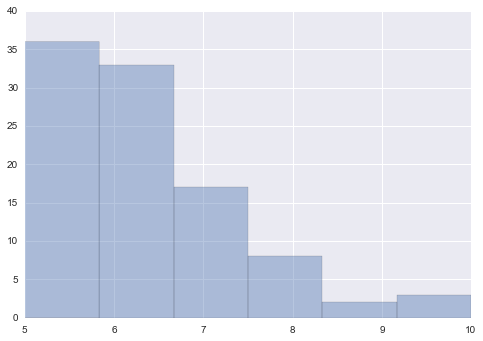

In [8]:
import seaborn as sns

minsize = 5
a = nx.find_cliques(gr)

subg = [g for g in a if len(g)>=minsize]
print("Num of cliques = %d" % len(subg))

gdist = [len(g) for g in subg]

sns.distplot(gdist, kde=False)

Now we can visualize the cliques the final map will visualize one of them (you can change the value to see different cliques)

In [9]:
# Pick the clique to visualize
c = subg[25]

mymap = folium.Map(location=[(coord[0] + coord[1]) / 2.0, (coord[2] + coord[3]) / 2.0], zoom_start=13, width=800,
                   height=500)
seq = []
for i in c:
    x, y, h = i.split('#')
    seq.append((x, y, h))
for s1 in seq:
    for s2 in seq:
        if s1 != s2:
            x1, y1, _ = s1
            x2, y2, _ = s2
            x1 = float(x1)
            y1 = float(y1)
            x2 = float(x2)
            y2 = float(y2)
            mymap.line([(x1, y1), (x2, y2)],line_color='red', line_opacity=1.0, line_weight=2)

mymap

<iframe srcdoc="<!DOCTYPE html>
<head>
  <meta http-equiv=&quot;content-type&quot; content=&quot;text/html; charset=UTF-8&quot; />
   <link rel=&quot;stylesheet&quot; href=&quot;https://rawgit.com/andrewgiessel/leafletstuff/master/leaflet.css&quot; />
   <script src=&quot;https://cdnjs.cloudflare.com/ajax/libs/leaflet/0.7.3/leaflet.js&quot;></script>

   <script src=&quot;https://ajax.googleapis.com/ajax/libs/jquery/1.11.1/jquery.min.js&quot;></script>

   <link rel=&quot;stylesheet&quot; href=&quot;https://maxcdn.bootstrapcdn.com/bootstrap/3.2.0/css/bootstrap.min.css&quot;>
   <link rel=&quot;stylesheet&quot; href=&quot;https://maxcdn.bootstrapcdn.com/bootstrap/3.2.0/css/bootstrap-theme.min.css&quot;>
   <script src=&quot;https://maxcdn.bootstrapcdn.com/bootstrap/3.2.0/js/bootstrap.min.js&quot;></script>

   <link href=&quot;https://maxcdn.bootstrapcdn.com/font-awesome/4.1.0/css/font-awesome.min.css&quot; rel=&quot;stylesheet&quot;>

   <link rel=&quot;stylesheet&quot; href=&quot;https://rawgit.com/lvoogdt/Leaflet.awesome-markers/2.0/develop/dist/leaflet.awesome-markers.css&quot;>
   <script src=&quot;https://rawgithub.com/lvoogdt/Leaflet.awesome-markers/2.0/develop/dist/leaflet.awesome-markers.js&quot;></script>


   <link rel=&quot;stylesheet&quot; href=&quot;https://cdnjs.cloudflare.com/ajax/libs/leaflet.markercluster/0.4.0/MarkerCluster.Default.css&quot;>
   <link rel=&quot;stylesheet&quot; href=&quot;https://cdnjs.cloudflare.com/ajax/libs/leaflet.markercluster/0.4.0/MarkerCluster.css&quot;>
   <script src=&quot;https://cdnjs.cloudflare.com/ajax/libs/leaflet.markercluster/0.4.0/leaflet.markercluster-src.js&quot;></script>
   <script src=&quot;https://cdnjs.cloudflare.com/ajax/libs/leaflet.markercluster/0.4.0/leaflet.markercluster.js&quot;></script>

   <link rel=&quot;stylesheet&quot; href=&quot;https://birdage.github.io/Leaflet.awesome-markers/dist/leaflet.awesome.rotate.css&quot;>

   
   
   
   

   <style>

      html, body {
        width: 100%;
        height: 100%;
        margin: 0;
        padding: 0;
      }

      #map {
        position:absolute;
        top:0;
        bottom:0;
        right:0;
        left:0;
      }

   </style>
</head>

<body>

   <div class=&quot;folium-map&quot; id=&quot;folium_b61bcfb4deb941738cd1e2739f1e1e08&quot; style=&quot;width: 800px; height: 500px&quot;></div>

   <script>

      

      var base_tile = L.tileLayer('https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', {
          maxZoom: 18,
          minZoom: 1,
          attribution: 'Map data (c) <a href=&quot;http://openstreetmap.org&quot;>OpenStreetMap</a> contributors'
      });

      var baseLayer = {
        &quot;Base Layer&quot;: base_tile
      };

      /*
      addition of the wms layers
      */

      

      /*
      addition of the tile layers
      */
      

      /*
      list of layers to be added
      */
      var layer_list = {
      
      };

      /*
      Bounding box.
      */
      var southWest = L.latLng(-90, -180),
          northEast = L.latLng(90, 180),
          bounds = L.latLngBounds(southWest, northEast);

      /*
      Creates the map and adds the selected layers
      */
      var map = L.map('folium_b61bcfb4deb941738cd1e2739f1e1e08', {
                                       center:[51.515, -0.125],
                                       zoom: 13,
                                       maxBounds: bounds,
                                       layers: [base_tile]
                                     });

      L.control.layers(baseLayer, layer_list).addTo(map);

      /*
      addition of the image layers
      */
      
      
      //cluster group
      var clusteredmarkers = L.markerClusterGroup();
      //section for adding clustered markers
      
      //add the clustered markers to the group anyway
      map.addLayer(clusteredmarkers);

      

      

      
      var latLngs = [ [51.525849, -0.07788],  [51.523897, -0.075675], ];
var line_1 = L.polyline(latLngs,{
color: 'red',
w

We can also extract other dense graphs like the $k$-cores, graphs where all the nodes have a degree higher or equal than $k$

In [10]:
kcore = nx.k_core(gr,k=5)
kcore
mymap = folium.Map(location=[(coord[0] + coord[1]) / 2.0, (coord[2] + coord[3]) / 2.0], zoom_start=13, width=800,
                   height=500)

for ed1, ed2 in nx.edges_iter(kcore):
    x1, y1, _= ed1.split('#')
    x2, y2, _= ed2.split('#')
    mymap.line([(x1, y1), (x2, y2)],line_color='red', line_opacity=1.0, line_weight=2)

mymap

<iframe srcdoc="<!DOCTYPE html>
<head>
  <meta http-equiv=&quot;content-type&quot; content=&quot;text/html; charset=UTF-8&quot; />
   <link rel=&quot;stylesheet&quot; href=&quot;https://rawgit.com/andrewgiessel/leafletstuff/master/leaflet.css&quot; />
   <script src=&quot;https://cdnjs.cloudflare.com/ajax/libs/leaflet/0.7.3/leaflet.js&quot;></script>

   <script src=&quot;https://ajax.googleapis.com/ajax/libs/jquery/1.11.1/jquery.min.js&quot;></script>

   <link rel=&quot;stylesheet&quot; href=&quot;https://maxcdn.bootstrapcdn.com/bootstrap/3.2.0/css/bootstrap.min.css&quot;>
   <link rel=&quot;stylesheet&quot; href=&quot;https://maxcdn.bootstrapcdn.com/bootstrap/3.2.0/css/bootstrap-theme.min.css&quot;>
   <script src=&quot;https://maxcdn.bootstrapcdn.com/bootstrap/3.2.0/js/bootstrap.min.js&quot;></script>

   <link href=&quot;https://maxcdn.bootstrapcdn.com/font-awesome/4.1.0/css/font-awesome.min.css&quot; rel=&quot;stylesheet&quot;>

   <link rel=&quot;stylesheet&quot; href=&quot;https://rawgit.com/lvoogdt/Leaflet.awesome-markers/2.0/develop/dist/leaflet.awesome-markers.css&quot;>
   <script src=&quot;https://rawgithub.com/lvoogdt/Leaflet.awesome-markers/2.0/develop/dist/leaflet.awesome-markers.js&quot;></script>


   <link rel=&quot;stylesheet&quot; href=&quot;https://cdnjs.cloudflare.com/ajax/libs/leaflet.markercluster/0.4.0/MarkerCluster.Default.css&quot;>
   <link rel=&quot;stylesheet&quot; href=&quot;https://cdnjs.cloudflare.com/ajax/libs/leaflet.markercluster/0.4.0/MarkerCluster.css&quot;>
   <script src=&quot;https://cdnjs.cloudflare.com/ajax/libs/leaflet.markercluster/0.4.0/leaflet.markercluster-src.js&quot;></script>
   <script src=&quot;https://cdnjs.cloudflare.com/ajax/libs/leaflet.markercluster/0.4.0/leaflet.markercluster.js&quot;></script>

   <link rel=&quot;stylesheet&quot; href=&quot;https://birdage.github.io/Leaflet.awesome-markers/dist/leaflet.awesome.rotate.css&quot;>

   
   
   
   

   <style>

      html, body {
        width: 100%;
        height: 100%;
        margin: 0;
        padding: 0;
      }

      #map {
        position:absolute;
        top:0;
        bottom:0;
        right:0;
        left:0;
      }

   </style>
</head>

<body>

   <div class=&quot;folium-map&quot; id=&quot;folium_9a6e68990fd34ebfa34faa12cc24d7ca&quot; style=&quot;width: 800px; height: 500px&quot;></div>

   <script>

      

      var base_tile = L.tileLayer('https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', {
          maxZoom: 18,
          minZoom: 1,
          attribution: 'Map data (c) <a href=&quot;http://openstreetmap.org&quot;>OpenStreetMap</a> contributors'
      });

      var baseLayer = {
        &quot;Base Layer&quot;: base_tile
      };

      /*
      addition of the wms layers
      */

      

      /*
      addition of the tile layers
      */
      

      /*
      list of layers to be added
      */
      var layer_list = {
      
      };

      /*
      Bounding box.
      */
      var southWest = L.latLng(-90, -180),
          northEast = L.latLng(90, 180),
          bounds = L.latLngBounds(southWest, northEast);

      /*
      Creates the map and adds the selected layers
      */
      var map = L.map('folium_9a6e68990fd34ebfa34faa12cc24d7ca', {
                                       center:[51.515, -0.125],
                                       zoom: 13,
                                       maxBounds: bounds,
                                       layers: [base_tile]
                                     });

      L.control.layers(baseLayer, layer_list).addTo(map);

      /*
      addition of the image layers
      */
      
      
      //cluster group
      var clusteredmarkers = L.markerClusterGroup();
      //section for adding clustered markers
      
      //add the clustered markers to the group anyway
      map.addLayer(clusteredmarkers);

      

      

      
      var latLngs = [ [51.523897, -0.075675],  [51.526966, -0.080399], ];
var line_1 = L.polyline(latLngs,{
color: 'red',


We can also apply a community discovery algorithm from social networks to partition the graph. We will use the community python package http://perso.crans.org/aynaud/communities/index.html

In [11]:
import community
def colorize(v):
    v = int(2**24 /(v+50)*15)
    return('#%s'%hex(v)[2:])

partition = community.best_partition(gr)

mymap = folium.Map(location=[(coord[0] + coord[1]) / 2.0, (coord[2] + coord[3]) / 2.0], zoom_start=13, width=800,
                   height=500)
for vert in partition:
    x1, y1, _= vert.split('#')
    c = colorize(partition[vert])
    mymap.circle_marker(location=[x1,y1], radius=40,line_color=c, fill_color=c)
mymap

<iframe srcdoc="<!DOCTYPE html>
<head>
  <meta http-equiv=&quot;content-type&quot; content=&quot;text/html; charset=UTF-8&quot; />
   <link rel=&quot;stylesheet&quot; href=&quot;https://rawgit.com/andrewgiessel/leafletstuff/master/leaflet.css&quot; />
   <script src=&quot;https://cdnjs.cloudflare.com/ajax/libs/leaflet/0.7.3/leaflet.js&quot;></script>

   <script src=&quot;https://ajax.googleapis.com/ajax/libs/jquery/1.11.1/jquery.min.js&quot;></script>

   <link rel=&quot;stylesheet&quot; href=&quot;https://maxcdn.bootstrapcdn.com/bootstrap/3.2.0/css/bootstrap.min.css&quot;>
   <link rel=&quot;stylesheet&quot; href=&quot;https://maxcdn.bootstrapcdn.com/bootstrap/3.2.0/css/bootstrap-theme.min.css&quot;>
   <script src=&quot;https://maxcdn.bootstrapcdn.com/bootstrap/3.2.0/js/bootstrap.min.js&quot;></script>

   <link href=&quot;https://maxcdn.bootstrapcdn.com/font-awesome/4.1.0/css/font-awesome.min.css&quot; rel=&quot;stylesheet&quot;>

   <link rel=&quot;stylesheet&quot; href=&quot;https://rawgit.com/lvoogdt/Leaflet.awesome-markers/2.0/develop/dist/leaflet.awesome-markers.css&quot;>
   <script src=&quot;https://rawgithub.com/lvoogdt/Leaflet.awesome-markers/2.0/develop/dist/leaflet.awesome-markers.js&quot;></script>


   <link rel=&quot;stylesheet&quot; href=&quot;https://cdnjs.cloudflare.com/ajax/libs/leaflet.markercluster/0.4.0/MarkerCluster.Default.css&quot;>
   <link rel=&quot;stylesheet&quot; href=&quot;https://cdnjs.cloudflare.com/ajax/libs/leaflet.markercluster/0.4.0/MarkerCluster.css&quot;>
   <script src=&quot;https://cdnjs.cloudflare.com/ajax/libs/leaflet.markercluster/0.4.0/leaflet.markercluster-src.js&quot;></script>
   <script src=&quot;https://cdnjs.cloudflare.com/ajax/libs/leaflet.markercluster/0.4.0/leaflet.markercluster.js&quot;></script>

   <link rel=&quot;stylesheet&quot; href=&quot;https://birdage.github.io/Leaflet.awesome-markers/dist/leaflet.awesome.rotate.css&quot;>

   
   
   
   

   <style>

      html, body {
        width: 100%;
        height: 100%;
        margin: 0;
        padding: 0;
      }

      #map {
        position:absolute;
        top:0;
        bottom:0;
        right:0;
        left:0;
      }

   </style>
</head>

<body>

   <div class=&quot;folium-map&quot; id=&quot;folium_1322c6c03de14fb0975a16d2935a5f70&quot; style=&quot;width: 800px; height: 500px&quot;></div>

   <script>

      

      var base_tile = L.tileLayer('https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', {
          maxZoom: 18,
          minZoom: 1,
          attribution: 'Map data (c) <a href=&quot;http://openstreetmap.org&quot;>OpenStreetMap</a> contributors'
      });

      var baseLayer = {
        &quot;Base Layer&quot;: base_tile
      };

      /*
      addition of the wms layers
      */

      

      /*
      addition of the tile layers
      */
      

      /*
      list of layers to be added
      */
      var layer_list = {
      
      };

      /*
      Bounding box.
      */
      var southWest = L.latLng(-90, -180),
          northEast = L.latLng(90, 180),
          bounds = L.latLngBounds(southWest, northEast);

      /*
      Creates the map and adds the selected layers
      */
      var map = L.map('folium_1322c6c03de14fb0975a16d2935a5f70', {
                                       center:[51.515, -0.125],
                                       zoom: 13,
                                       maxBounds: bounds,
                                       layers: [base_tile]
                                     });

      L.control.layers(baseLayer, layer_list).addTo(map);

      /*
      addition of the image layers
      */
      
      
      //cluster group
      var clusteredmarkers = L.markerClusterGroup();
      //section for adding clustered markers
      
      //add the clustered markers to the group anyway
      map.addLayer(clusteredmarkers);

      

      
      var circle_1 = L.circle([51.508635, -0.137759], 40, {
                            color: '#4ccccc',
                        